## Modeling the accretion rate for the following

### Install these packages
using Pkg; Pkg.add(package)

In [1]:
using QuadGK
using SpecialFunctions
using Plots

In [47]:
N=100
rho_w = 998
rho_a = 1.2
rho_ice = 0.917e3
g = 9.81
mu_w = 1e-3
mu_a = 1.75e-5
C_d = 0.55
m_e = 3
r_0 = 1e-3
r_0_ice = 1e-5
r_0 = 1e-3
n_0 = 16e6
n_0_ice = 2e7
q_rai = LinRange(0, 5e-3, N)
q_ice = 1e-4
E_cp = 0.8
E_ir = 1
v_e = 1/2
a_e = 2

2

In [48]:
m_0 = 4*pi*rho_w*r_0*r_0*r_0/3
m_0_ice = 4*pi*rho_ice*r_0_ice*r_0_ice*r_0_ice/3
a_0 = pi*r_0*r_0
a_0_ice = pi*r_0_ice*r_0_ice
v_0_kin = sqrt((8*g*r_0*(rho_w - rho_a))/(3*C_d*rho_a))
v_0_sto = 2*r_0*r_0*g*(rho_w - rho_a)/(9*mu_w)
lambda_ice = ((gamma(m_e+1)*m_0_ice*n_0_ice)/(q_ice*rho_a*(r_0_ice^m_e)))^(1/(m_e+1))
lambda_rai = [((gamma(m_e+1)*m_0*n_0)/(q*rho_a*(r_0^m_e)))^(1/(m_e+1)) for q in q_rai];

In [49]:
R = LinRange(0, 5e-3, 100)
Q = LinRange(1e-3, 1e-2, 3)
lambda = [((gamma(m_e+1)*m_0*n_0)/(q*rho_a*(r_0^m_e)))^(1/(m_e+1)) for q in Q];
p = plot(title="Distribution", xlabel="R [mm]")
for i in 1:3
    plot!(R*1e3, [n_0*exp(-lambda[i]*r) for r in R], yaxis=:log)
end
# p

In [ ]:
q_ice = 1e-4
lambda_ice = ((gamma(m_e+1)*m_0_ice*n_0_ice)/(q_ice*rho_a*(r_0_ice^m_e)))^(1/(m_e+1))
ac_rain_ice_kin = [n_0*n_0_ice*m_0*a_0*v_0_kin*E_ir*gamma(m_e+a_e+v_e+1)/(((lambda_rai[i])^(1+a_e+v_e+m_e))*(r_0^(a_e+v_e+m_e))*lambda_ice*rho_a)
    for i in 1:N]
plot(q_rai*1e3, ac_rain_ice_kin, linewidth=3)
q_ice = 1e-5
lambda_ice = ((gamma(m_e+1)*m_0_ice*n_0_ice)/(q_ice*rho_a*(r_0_ice^m_e)))^(1/(m_e+1))
ac_rain_ice_kin = [n_0*n_0_ice*m_0*a_0*v_0_kin*E_ir*gamma(m_e+a_e+v_e+1)/(((lambda_rai[i])^(1+a_e+v_e+m_e))*(r_0^(a_e+v_e+m_e))*lambda_ice*rho_a)
    for i in 1:N]
plot!(q_rai*1e3, ac_rain_ice_kin, linewidth=3)
q_ice = 1e-6
lambda_ice = ((gamma(m_e+1)*m_0_ice*n_0_ice)/(q_ice*rho_a*(r_0_ice^m_e)))^(1/(m_e+1))
ac_rain_ice_kin = [n_0*n_0_ice*m_0*a_0*v_0_kin*E_ir*gamma(m_e+a_e+v_e+1)/(((lambda_rai[i])^(1+a_e+v_e+m_e))*(r_0^(a_e+v_e+m_e))*lambda_ice*rho_a)
    for i in 1:N]
plot!(q_rai*1e3, ac_rain_ice_kin, linewidth=3)

In [ ]:
f_kin(r) = [q_rai[i]*exp(-lambda_rai[i]*r)*r^(5/2) for i in 1:N]
f_sto(r) = [q_rai[i]*exp(-lambda_rai[i]*r)*r^(4) for i in 1:N]
I_kin,err_kin = quadgk(f_kin, 0, Inf, rtol=1e-8)
I_sto,err_sto = quadgk(f_sto, 0, Inf, rtol=1e-8)
ac_rain_kin = [n_0*a_0*v_0_kin*E_cp*(r_0^(-5/2))*I_kin[i] for i in 1:N];
ac_rain_sto = [n_0*a_0*v_0_sto*E_cp*(r_0^(-4))*I_sto[i] for i in 1:N];

In [ ]:
plot(q_rai*1e3, ac_rain_sto, linewidth=3, xlabel="q_liq [g/kg]", ylabel="rain accretion rate (without collision) [1/s]", label="Stoke's drag", legend=:topleft)
plot!(q_rai*1e3, ac_rain_kin, linewidth=3, xlabel="q_liq [g/kg]", ylabel="rain accretion rate (without collision) [1/s]", label="Kinetic drag")

In [ ]:
v_t = [v_0_kin*((r_0*lambda_rai[i])^(-v_e))*gamma(v_e+m_e+1)/gamma(m_e+1) for i in 1:100];
plot(q_rai*1e3, v_t[:], linewidth=3, xlabel="q_liq [g/kg]", ylabel="Terminal Velocity (m/s)", label="Rain",legend = false)

### Snowflake modeling
#### 1. Height proportional radius case

$h = \alpha r$

In [62]:
rho_0 = 1
rho_s = 0.5e3
r_0_snow = 1e-3
m_e_snow = 2
a_0_snow = pi*r_0_snow*r_0_snow
a_e_snow = 2
v_e_snow = 1/2
C_d_snow = 1.3
E_is = 0.1
q_snow = LinRange(1e-8, 5e-3, N);

In [4]:
alpha = [5e-3,7.5e-3,1e-2]
function ac_snow(alpha, q_snow, stokes::Bool)
    m_0_snow = alpha*pi*r_0_snow*r_0_snow*r_0_snow*rho_s
    n_0_snow = 4.36e9*(rho_a*q_snow)^0.63
    v_0_snow = stokes ? ( alpha*g*r_0_snow*r_0_snow*(rho_s - rho_a)/(2*mu_a*(1+sqrt(2+4*alpha))) ) : ( sqrt(2*alpha*g*r_0_snow*(rho_s - rho_a)/(C_d*rho_a)) )
    r_exp = stokes ? 4 : 5/2
    f_snow(r) = q_snow*exp(-lambda_snow*r)*r^(r_exp)
    lambda_snow = ((gamma(m_e_snow+1)*m_0_snow*n_0_snow)/(q_snow*rho_a*(r_0_snow^m_e_snow)))^(1/(m_e_snow+1))
    I_snow,err = quadgk(f_snow, 0, Inf, rtol=1e-8)
    return n_0_snow*a_0_snow*v_0_snow*E_is*r_0_snow^(-r_exp)*I_snow
end

ac_snow (generic function with 1 method)

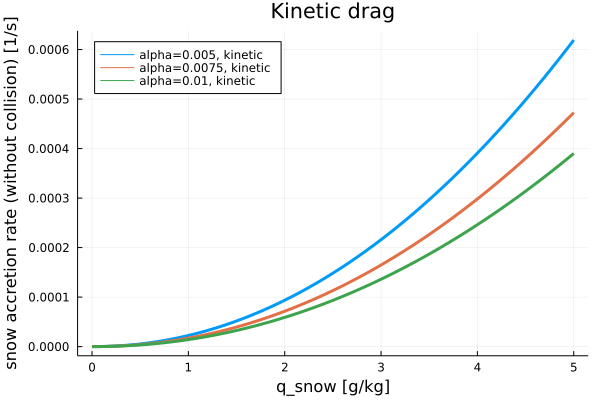

In [11]:
p_kin = plot(title="Kinetic drag", xlabel="q_snow [g/kg]", ylabel="snow accretion rate (without collision) [1/s]", legend=:topleft)
for alph in alpha
    plot!(q_snow*1e3, [ac_snow(alph, qs, false) for qs in q_snow], linewidth=3, label="alpha=$alph, kinetic")
end
p_kin

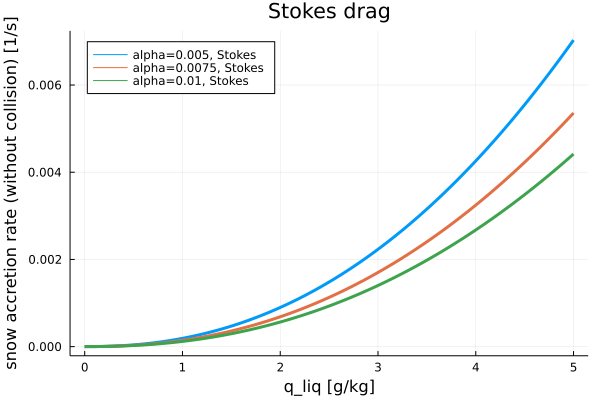

In [9]:
p_sto = plot(title="Stokes drag", xlabel="q_snow [g/kg]", ylabel="snow accretion rate (without collision) [1/s]", legend=:topleft)
for alph in alpha
   plot!(q_snow*1e3, [ac_snow(alph, qs, true) for qs in q_snow], linewidth=3, label="alpha=$alph, Stokes")
end
p_sto

#### 2. Constant height case

In [12]:
h_0 = [5e-7, 1e-6, 5e-6];
function ac_snow_h_const(h_0, q_snow, stokes::Bool)
    m_0_snow = pi*r_0_snow*r_0_snow*h_0*rho_s
    n_0_snow = 4.36e9*(rho_a*q_snow)^0.63
    v_0_snow = stokes ? ( sqrt(r_0_snow*r_0_snow*h_0*g*(rho_s - rho_a)/(2*mu_a*(r_0_snow*sqrt(2*r_0_snow*r_0_snow + 4*r_0_snow*h_0)))) ) : ( sqrt(2*h_0*g*(rho_s - rho_a)/(C_d_snow*rho_a)) )
    lambda_snow = ((gamma(m_e_snow+1)*m_0_snow*n_0_snow)/(q_snow*rho_a*(r_0_snow^m_e_snow)))^(1/(m_e_snow+1))
    f_snow(r) = stokes ? q_snow*exp(-lambda_snow*r)*r^(4)/(r*sqrt(2*r*r + 4*r*h_0)) : q_snow*exp(-lambda_snow*r)*r^(2)
    I_snow,err = quadgk(f_snow, 0, Inf, rtol=1e-8)
    return(stokes ? n_0_snow*pi*h_0*g*((rho_s - rho_a)/(2*mu_a))*E_is*I_snow : n_0_snow*pi*v_0_snow*E_is*I_snow)
end;

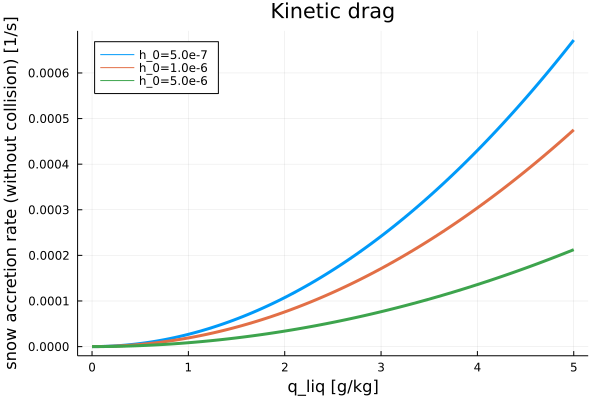

In [14]:
p_kin = plot(title="Kinetic drag", xlabel="q_liq [g/kg]", ylabel="snow accretion rate (without collision) [1/s]", legend=:topleft)
for h0 in h_0
    plot!(q_snow*1e3, [ac_snow_h_const(h0, qs, false) for qs in q_snow], linewidth=3, label="h_0=$h0")
end
p_kin

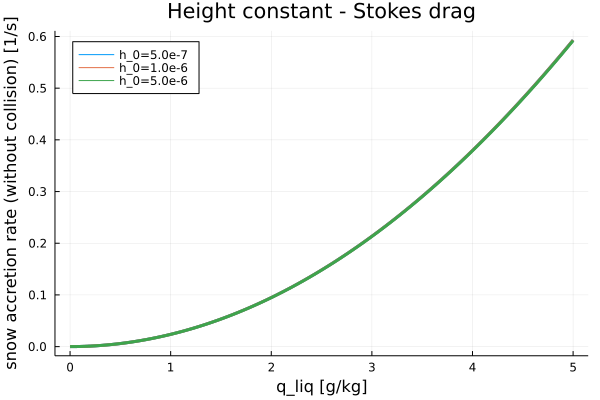

In [15]:
p_sto = plot(title="Height constant - Stokes drag", xlabel="q_liq [g/kg]", ylabel="snow accretion rate (without collision) [1/s]", legend=:topleft)
for h0 in h_0
    plot!(q_snow*1e3, [ac_snow_h_const(h0, qs, true) for qs in q_snow], linewidth=3, label="h_0=$h0")
end
p_sto

#### 3. Snowflakes with holes 
1. Height proportional to the radius

In [86]:
beta_min = [0.25, 0.5, 0.75]
lambda_b = 1e6
alpha = 5e-3
function ac_snow_holes(beta_min, q_snow, stokes::Bool)
    beta(r) = beta_min + (1-beta_min)*exp(-lambda_b*r)
    m_0_snow = beta(r_0_snow)*alpha*pi*r_0_snow*r_0_snow*r_0_snow*rho_s
    n_0_snow = 4.36e9*(rho_a*q_snow)^0.63
    a(r) = beta(r)*pi*r*r
    v_t(r) = stokes ? ( sqrt(r*r*h_0*g*(rho_s - rho_a)/(2*mu_a*(r*sqrt(2*r*r + 4*r*h_0)))) ) : ( sqrt(2*alpha*g*r*(rho_s - rho_a)/(C_d*rho_a)) )
    lambda_snow = ((gamma(m_e_snow+1)*m_0_snow*n_0_snow)/(q_snow*rho_a*(r_0_snow^m_e_snow)))^(1/(m_e_snow+1))
    f(r) = n_0_snow*a(r)*v_t(r)*exp(-lambda_snow*r)*q_snow*E_is
    I,err = quadgk(f, 0, Inf, rtol=1e-8)
    return I
end

ac_snow_holes (generic function with 1 method)

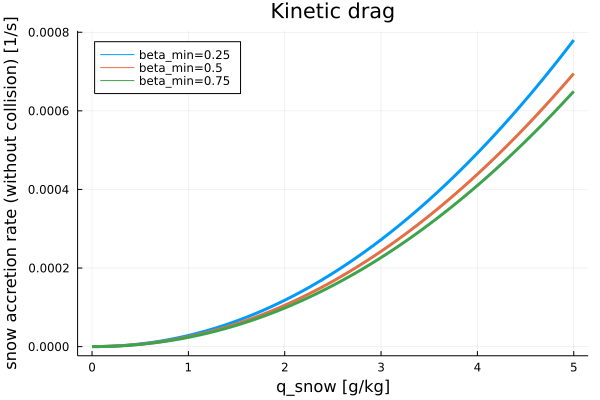

In [89]:
p_holes_kin = plot(title="Kinetic drag", xlabel="q_snow [g/kg]", ylabel="snow accretion rate (without collision) [1/s]", legend=:topleft)
for b_min in beta_min
    plot!(q_snow*1e3, [ac_snow_holes(b_min, qs, false) for qs in q_snow], linewidth=3, label="beta_min=$b_min")
end
p_holes_kin

In [90]:
p_holes_sto = plot(title="Stokes drag", xlabel="q_snow [g/kg]", ylabel="snow accretion rate (without collision) [1/s]", legend=:topleft)
for b_min in beta_min
    plot!(q_snow*1e3, [ac_snow_holes(b_min, qs, true) for qs in q_snow], linewidth=3, label="beta_min=$b_min")
end
p_holes_sto

LoadError: MethodError: no method matching +(::Float64, ::Vector{Float64})
For element-wise addition, use broadcasting with dot syntax: scalar .+ array
[0mClosest candidates are:
[0m  +(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at ~/PhD/julia-1.7.3/share/julia/base/operators.jl:655
[0m  +(::Union{Float16, Float32, Float64}, [91m::BigFloat[39m) at ~/PhD/julia-1.7.3/share/julia/base/mpfr.jl:413
[0m  +([91m::ChainRulesCore.Tangent{P}[39m, ::P) where P at ~/.julia/packages/ChainRulesCore/GUvJT/src/tangent_arithmetic.jl:146
[0m  ...

2. Constant height

In [ ]:
function ac_snow_holes(beta_min, q_snow, stokes::Bool)
    beta(r) = beta_min + (1-beta_min)*exp(-lambda_b*r)
    a(r) = beta(r)*pi*r*r
    v_t(r) = stokes ? ( sqrt(r_0_snow*r_0_snow*h_0*g*(rho_s - rho_a)/(2*mu_a*(r_0_snow*sqrt(2*r_0_snow*r_0_snow + 4*r_0_snow*h_0)))) ) : ( sqrt(2*alpha*g*r*(rho_s - rho_a)/(C_d*rho_a)) )
    lambda_snow = ((gamma(m_e_snow+1)*m_0_snow*n_0_snow)/(q_snow*rho_a*(r_0_snow^m_e_snow)))^(1/(m_e_snow+1))
    f(r) = n_0_snow*a(r)*v_t(r)*exp(-lambda_snow*r)
    I,err = quadgk(f, 0, Inf, rtol=1e-8)
    return I
end